In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 채널별로 평균과 표준편차 구하기기
x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train, axis = (0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

170498071/170498071 [==============================] - 8s 0us/step


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam
from keras.regularizers import l2

model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)),
    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Flatten(),
    Dense(256, activation = 'relu', kernel_regularizer = l2(0.001)),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 21s 9ms/step - loss: 1.8911 - acc: 0.4160 - val_loss: 1.5588 - val_acc: 0.5231
Epoch 2/30
1094/1094 [==============================] - 9s 9ms/step - loss: 1.4633 - acc: 0.5561 - val_loss: 1.3681 - val_acc: 0.5793
Epoch 3/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2645 - acc: 0.6245 - val_loss: 1.2592 - val_acc: 0.6083
Epoch 4/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1260 - acc: 0.6673 - val_loss: 1.1532 - val_acc: 0.6517
Epoch 5/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0219 - acc: 0.6986 - val_loss: 1.0304 - val_acc: 0.6903
Epoch 6/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.9312 - acc: 0.7281 - val_loss: 0.9851 - val_acc: 0.7042
Epoch 7/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.8512 - acc: 0.7549 - val_loss: 0.9919 - val_acc: 0.7039
Epoch 8/30
1094/1094 [==============================] - 

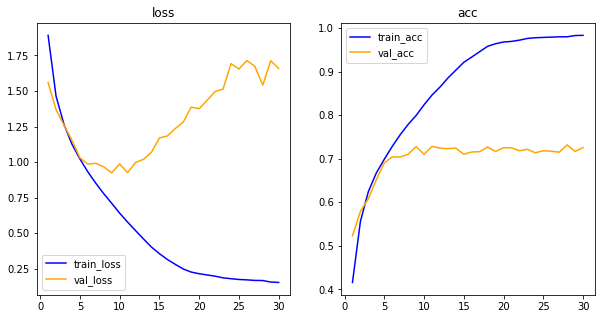

In [6]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('acc')
ax2.legend()

plt.show()

* 이전 그래프보다 꺾이는 각도가 더 안정적임